# Performing a complete analysis on the dataset, including:

Data cleaning <br>
Handling missing values <br>
Outlier detection and handling <br>
Encoding <br>
Scaling <br>
PCA (retaining most of the information)

### Handling Missing Values

In [3]:
import pandas as pd 
import numpy as np 
import numpy.char as char

In [4]:
bc_data = pd.read_csv("/workspaces/Blockchain-Integrated-Machine-Learning-System-for-Cryptocurrency-Fraud-Detection/Week 1 Assignment - Data Analysis/Messy_Employment_India_Dataset.csv")

In [5]:
bc_data

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023
...,...,...,...,...,...,...,...,...,...
1995,employed,25-34,Ph.D,Finance,Hyderabad,Low,NaN,113000.0,6/18/2028
1996,EMPLOYED,25-34,PhD,Tech,NaN,NaN,22.0,102200.0,6/19/2028
1997,NaN,35 - 44,Masters,Education,NaN,low,NaN,31600.0,6/20/2028
1998,EMPLOYED,25_34,high school,Retail,Mumbai,HIGH,22.0,92500.0,6/21/2028


In [6]:
bc_data.head()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023


In [7]:
bc_data.head(6)

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023
5,Unemployed,25_34,PhD,Tech,Bangalore,HIGH,NaN,54500.0,1/6/2023


In [8]:
missing_value_count = bc_data.isnull().sum()

In [9]:
missing_value_count

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [10]:
missing_value_count[0:10]

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [11]:
total_cells = np.prod(bc_data.shape)
total_cells

np.int64(18000)

In [12]:
total_missing = missing_value_count.sum()
total_missing

np.int64(2801)

In [13]:
#Percentage of data that is missing
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

15.561111111111112


In [14]:
# look at the # of missing points in the first ten columns
missing_value_count[0:10]

Status                   268
Age Group                232
Education                196
Industry                 201
Location                 213
AI Risk                  284
Years of Experience     1020
Monthly Salary (INR)     387
Date Recorded              0
dtype: int64

In [15]:
# remove all the rows that contain a missing value
# bc_data.dropna()

In [16]:
# remove all columns with at least one missing value
columns_with_na_dropped = bc_data.dropna(axis=1)
columns_with_na_dropped.head()


,Date Recorded
0,1/1/2023
1,1/2/2023
2,1/3/2023
3,1/4/2023
4,1/5/2023


In [17]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % bc_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 9 

Columns with na's dropped: 1


In [18]:
#Fill misiing value automatically

In [19]:
subset_bc_data = bc_data['Years of Experience']
subset_bc_data

0        NaN
1        NaN
2       16.0
3       30.0
4        9.0
        ... 
1995     NaN
1996    22.0
1997     NaN
1998    22.0
1999     NaN
Name: Years of Experience, Length: 2000, dtype: float64

In [20]:
subset_bc_data.fillna(0)

0        0.0
1        0.0
2       16.0
3       30.0
4        9.0
        ... 
1995     0.0
1996    22.0
1997     0.0
1998    22.0
1999     0.0
Name: Years of Experience, Length: 2000, dtype: float64

In [21]:
subset_bc_data.fillna(method='bfill', axis = 0).fillna(0)

/tmp/ipykernel_20589/3626028888.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_bc_data.fillna(method='bfill', axis = 0).fillna(0)


0       16.0
1       16.0
2       16.0
3       30.0
4        9.0
        ... 
1995    22.0
1996    22.0
1997    22.0
1998    22.0
1999     0.0
Name: Years of Experience, Length: 2000, dtype: float64

### Scaling and Normalization

In [22]:
import scipy
print(scipy.__version__)

1.16.3


In [23]:
from scipy import stats

In [24]:
import mlxtend
from mlxtend.preprocessing import minmax_scaling

In [25]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

In [27]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
original_data

array([1.01645284e-01, 6.47726806e-01, 1.54684140e+00, 2.70398682e-01,
       3.61626533e+00, 5.80897769e-01, 1.29965830e-01, 1.08831853e+00,
       2.22200345e+00, 1.67170911e+00, 2.51965326e+00, 6.90052938e-01,
       3.64435599e-02, 1.74937403e+00, 1.12999546e+00, 5.11345370e-01,
       7.84737748e-01, 3.07474485e-01, 5.31313662e-01, 1.04202427e+00,
       1.28902475e-01, 4.57836067e+00, 1.36078647e+00, 5.61579126e-02,
       1.67472164e+00, 1.99608749e-01, 5.59591695e-01, 3.27338200e-01,
       8.94033200e-01, 1.23692817e-02, 7.43635273e-01, 1.82015804e-01,
       1.88367536e+00, 1.66729773e+00, 1.27215732e-01, 2.78900400e-02,
       5.67605731e-01, 1.93945870e-01, 9.24292769e-01, 1.13277961e+00,
       6.48656874e-01, 5.94187544e-01, 2.15654793e+00, 3.10352716e+00,
       3.06022690e-01, 8.98273662e-01, 2.26458377e+00, 5.25919128e-01,
       4.13439854e-01, 1.88976713e+00, 1.48701547e-01, 7.01079677e-01,
       2.16692415e+00, 1.19995457e+00, 2.40095637e-01, 9.44927738e-02,
      

In [28]:
scaled_data = minmax_scaling(original_data, columns=[0])
scaled_data

array([[1.68443794e-02],
       [1.08339842e-01],
       [2.58985676e-01],
       [4.51188579e-02],
       [6.05715775e-01],
       [9.71426978e-02],
       [2.15894610e-02],
       [1.82160585e-01],
       [3.72108465e-01],
       [2.79907146e-01],
       [4.21979419e-01],
       [1.15431547e-01],
       [5.91988968e-03],
       [2.92919833e-01],
       [1.89143518e-01],
       [8.54892566e-02],
       [1.31295901e-01],
       [5.13308750e-02],
       [8.88349258e-02],
       [1.74404024e-01],
       [2.14112969e-02],
       [7.66913975e-01],
       [2.27812340e-01],
       [9.22301156e-03],
       [2.80411893e-01],
       [3.32580689e-02],
       [9.35728845e-02],
       [5.46590223e-02],
       [1.49608255e-01],
       [1.88626623e-03],
       [1.24409219e-01],
       [3.03103869e-02],
       [3.15421900e-01],
       [2.79168024e-01],
       [2.11286847e-02],
       [4.48675520e-03],
       [9.49156290e-02],
       [3.23092587e-02],
       [1.54678218e-01],
       [1.89609999e-01],


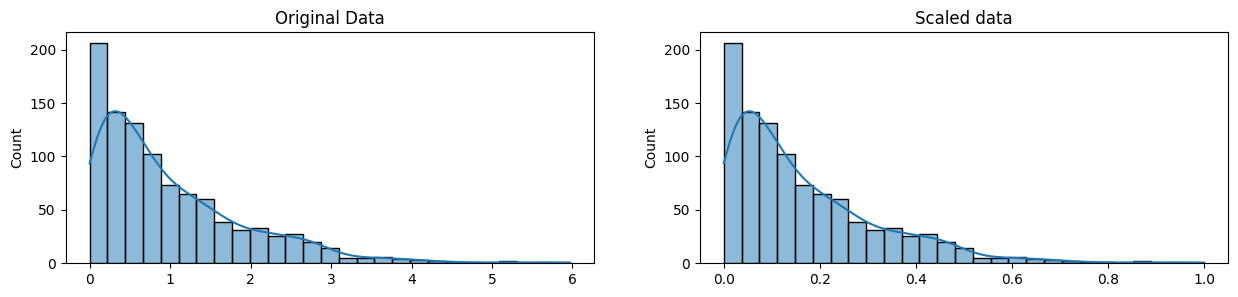

In [29]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [30]:
# normalizing the exponential data with boxcox

In [31]:
normalized_data = stats.boxcox(original_data)
normalized_data

(array([-1.67214262e+00, -4.08089337e-01,  4.64962109e-01, -1.08872312e+00,
         1.55733617e+00, -5.02617642e-01, -1.54074549e+00,  8.56794468e-02,
         8.98244457e-01,  5.54043045e-01,  1.05957250e+00, -3.51755259e-01,
        -2.12988347e+00,  6.07087929e-01,  1.24401835e-01, -6.09599151e-01,
        -2.34093864e-01, -9.99079576e-01, -5.77878138e-01,  4.14115548e-02,
        -1.54529027e+00,  1.91157425e+00,  3.22220807e-01, -1.95333691e+00,
         5.56132882e-01, -1.28769740e+00, -5.34374477e-01, -9.54182577e-01,
        -1.10215308e-01, -2.48549054e+00, -2.83857383e-01, -1.34479390e+00,
         6.94995439e-01,  5.50977977e-01, -1.55255436e+00, -2.22853491e+00,
        -5.22330335e-01, -1.30567127e+00, -7.78358540e-02,  1.26952214e-01,
        -4.06823763e-01, -4.83226123e-01,  8.60729545e-01,  1.34032225e+00,
        -1.00244093e+00, -1.05631326e-01,  9.22229158e-01, -5.86363051e-01,
        -7.79339892e-01,  6.98875785e-01, -1.46468436e+00, -3.37484037e-01,
         8.6

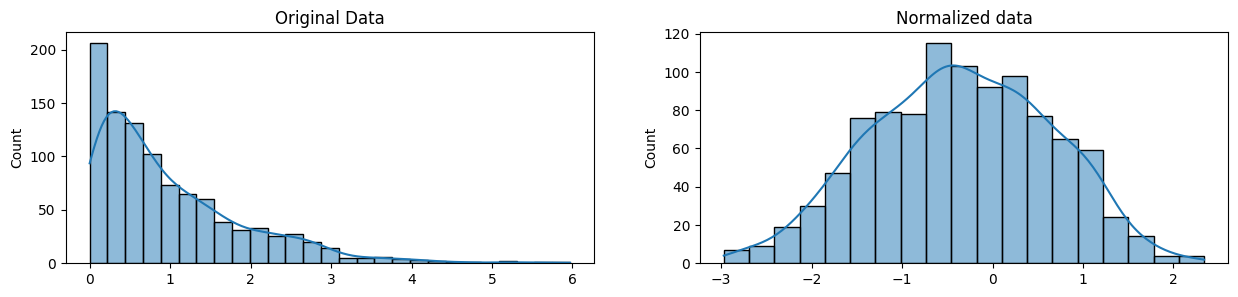

In [32]:
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [33]:
import datetime


### Parsing Dates

In [37]:
print(bc_data['Date Recorded'])

0        1/1/2023
1        1/2/2023
2        1/3/2023
3        1/4/2023
4        1/5/2023
          ...    
1995    6/18/2028
1996    6/19/2028
1997    6/20/2028
1998    6/21/2028
1999    6/22/2028
Name: Date Recorded, Length: 2000, dtype: object


In [38]:
#Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

In [ ]:
#Converting our date columns to datetime

In [ ]:
# we can see that it's in the format "month/day/four-digit year", so we can use the same syntax  to parse in our dates:
#%d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

In [43]:
bc_data['date_parsed'] = pd.to_datetime(bc_data['Date Recorded'], format="%m/%d/%Y")

In [44]:
bc_data

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded,date_parsed
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023,2023-01-01
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023,2023-01-02
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023,2023-01-03
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023,2023-01-04
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023,2023-01-05
...,...,...,...,...,...,...,...,...,...,...
1995,employed,25-34,Ph.D,Finance,Hyderabad,Low,NaN,113000.0,6/18/2028,2028-06-18
1996,EMPLOYED,25-34,PhD,Tech,NaN,NaN,22.0,102200.0,6/19/2028,2028-06-19
1997,NaN,35 - 44,Masters,Education,NaN,low,NaN,31600.0,6/20/2028,2028-06-20
1998,EMPLOYED,25_34,high school,Retail,Mumbai,HIGH,22.0,92500.0,6/21/2028,2028-06-21


In [45]:
bc_data['date_parsed'].head()

0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
Name: date_parsed, dtype: datetime64[ns]

In [46]:
# pandas try to infer what the right date format should be. You can do that like so:
#bc_date['date_parsed'] = pd.to_datetime(bc_data['Date Recorded'], infer_datetime_format=True)

In [49]:
# get the day of the month from the date_parsed column
day_of_month_bc = bc_data['date_parsed'].dt.day

In [50]:
day_of_month_bc

0        1
1        2
2        3
3        4
4        5
        ..
1995    18
1996    19
1997    20
1998    21
1999    22
Name: date_parsed, Length: 2000, dtype: int32

In [51]:
# remove na's
day_of_month_bc = day_of_month_bc.dropna()

/tmp/ipykernel_20589/1705921534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_bc, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

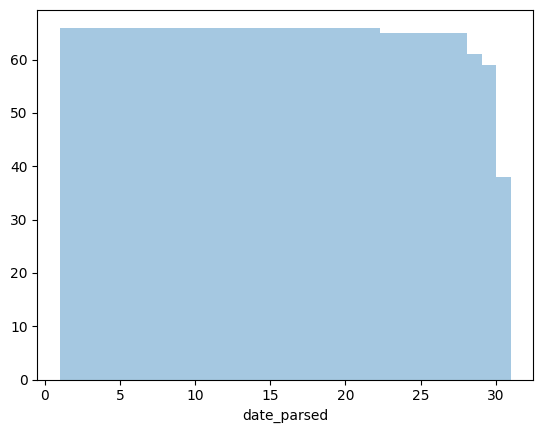

In [52]:
sns.distplot(day_of_month_bc, kde=False, bins=31)

### Character Encodings